In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def show_image(image1, image2, image3, suptitle=None, titles=[]):
    plt.figure(figsize=(12,4))

    if suptitle:
        plt.suptitle(suptitle)
        
    plt.subplot(131)
    if len(titles) >= 1:
        plt.title(titles[0])
    plt.imshow(image1)
    plt.axis("off")
    
    plt.subplot(132)
    if len(titles) >= 2:
        plt.title(titles[1])
    plt.imshow(image2)
    plt.axis("off")
    
    plt.subplot(133)
    if len(titles) >= 3:
        plt.title(titles[2])
    plt.imshow(image3)
    plt.axis("off")
    
    plt.show()

def get_mask(image):
    image = image.astype(np.uint8)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    binr = cv2.threshold(gray, 16, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    binr = np.invert(binr)
    kernel = np.ones((3, 3), np.uint8)
    mask = cv2.erode(binr, kernel, iterations=3)
    mask = (mask // 255).astype(np.uint8)
    return mask

def process_image(image):
    rgb_image = image.astype(np.uint8)
    mask = get_mask(rgb_image)
    gray = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
    rgb_planes = cv2.split(rgb_image)
    result_planes = []
    for plane in rgb_planes:
        processed_image = cv2.medianBlur(plane, 3)
        processed_image = cv2.bitwise_and(processed_image, processed_image, mask=mask)
        result_planes.append(processed_image)
    result = cv2.merge(result_planes)
    return result

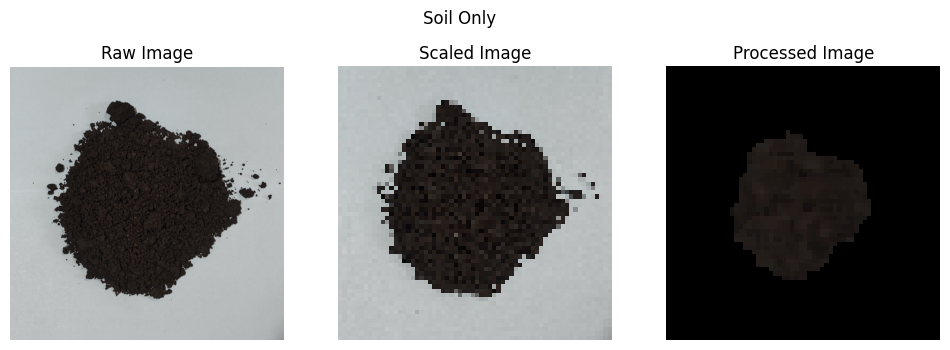

In [7]:
soil = cv2.imread("soil.jpg")
soil = cv2.cvtColor(soil, cv2.COLOR_BGR2RGB)
scaled_soil = cv2.resize(soil, dsize=(64, 64))
processed_scaled_soil = process_image(scaled_soil)

show_image(soil, scaled_soil, processed_scaled_soil, "Soil Only", ["Raw Image", "Scaled Image", "Processed Image"])


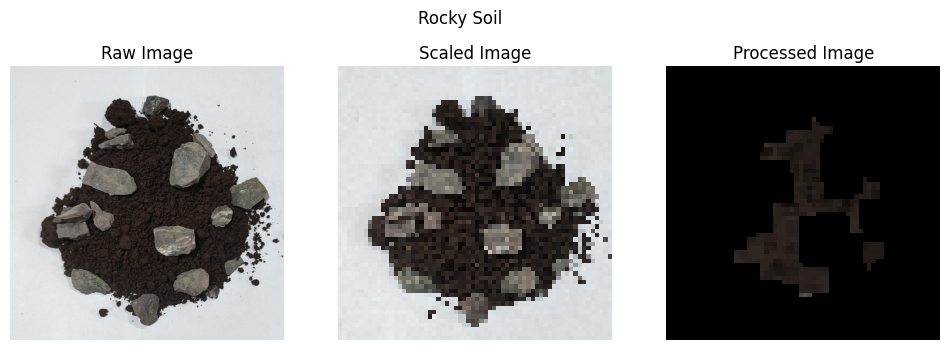

In [8]:
rocky_soil = cv2.imread("rocky.jpg")
rocky_soil = cv2.cvtColor(rocky_soil, cv2.COLOR_BGR2RGB)
scaled_rocky_soil = cv2.resize(rocky_soil, dsize=(64, 64))
processed_scaled_rocky_soil = process_image(scaled_rocky_soil)

show_image(rocky_soil, scaled_rocky_soil, processed_scaled_rocky_soil, "Rocky Soil", ["Raw Image", "Scaled Image", "Processed Image"])
